In [1]:
import pandas as pd

# Load the dataset from the saved CSV file
df_loaded = pd.read_csv('/kaggle/input/datathon-bert/best_updated_file.csv')

# Display basic information about the dataset and the first few rows
df_info = df_loaded.info()
df_head = df_loaded.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  int64  
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

(None,
    AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
 0          20       11.055215    221.104302          Premium   
 1          57        5.175208    294.986882            Basic   
 2          73       12.106657    883.785952            Basic   
 3          32        7.263743    232.439774            Basic   
 4          57       16.953078    966.325422          Premium   
 
       PaymentMethod PaperlessBilling ContentType  MultiDeviceAccess  \
 0      Mailed check               No        Both                  0   
 1       Credit card              Yes      Movies                  0   
 2      Mailed check              Yes      Movies                  0   
 3  Electronic check               No    TV Shows                  0   
 4  Electronic check              Yes    TV Shows                  0   
 
   DeviceRegistered  ViewingHoursPerWeek  ...  CustomerID  Churn  \
 0           Mobile            36.758104  ...  CB6SXPNVZA      0   
 1           Tablet            

# Behavioral Analysis

In [2]:
import pandas as pd

# Load the dataset from the saved CSV file
df_loaded = pd.read_csv('/kaggle/input/datathon-bert/best_updated_file.csv')

# Convert 'PaperlessBilling' to numeric
df_loaded['PaperlessBilling'] = df_loaded['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Calculate the BehavioralScore as an average of PaperlessBilling and MultiDeviceAccess
df_loaded['BehavioralScore'] = (df_loaded['PaperlessBilling'] + df_loaded['MultiDeviceAccess']) / 2

# Rename the dataframe for clarity
df_behavioral = df_loaded

# Display the updated DataFrame structure and the new column
print(df_behavioral[['PaperlessBilling', 'MultiDeviceAccess', 'BehavioralScore']].head(50))


    PaperlessBilling  MultiDeviceAccess  BehavioralScore
0                  0                  0              0.0
1                  1                  0              0.5
2                  1                  0              0.5
3                  0                  0              0.0
4                  1                  0              0.5
5                  1                  0              0.5
6                  0                  0              0.0
7                  1                  0              0.5
8                  0                  0              0.0
9                  0                  0              0.0
10                 0                  0              0.0
11                 0                  1              0.5
12                 1                  0              0.5
13                 0                  0              0.0
14                 0                  0              0.0
15                 1                  0              0.5
16                 1           

In [3]:
# Print the column names of the DataFrame
print(df_behavioral.columns.tolist())


['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating', 'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID', 'Churn', 'Feedback', 'TotalUsage', 'CostPerHour', 'Cluster', 'EngagementScore', 'SentimentDetails', 'Sentiment', 'SentimentScore', 'BehavioralScore']


In [4]:
print(df_behavioral.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  int64  
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  int64  
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [5]:
print(df_behavioral.head())

   AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod  PaperlessBilling ContentType  MultiDeviceAccess  \
0      Mailed check                 0        Both                  0   
1       Credit card                 1      Movies                  0   
2      Mailed check                 1      Movies                  0   
3  Electronic check                 0    TV Shows                  0   
4  Electronic check                 1    TV Shows                  0   

  DeviceRegistered  ViewingHoursPerWeek  ...  Churn  \
0           Mobile            36.758104  ...      0   
1           Tablet            32.450568  ...      0   
2         Compute

Train set shape after SMOTE: (319274, 38)
Test set shape: (48758, 38)
Before SMOTE: Churn
0    159637
1     35392
Name: count, dtype: int64
After SMOTE: Churn
0    159637
1    159637
Name: count, dtype: int64


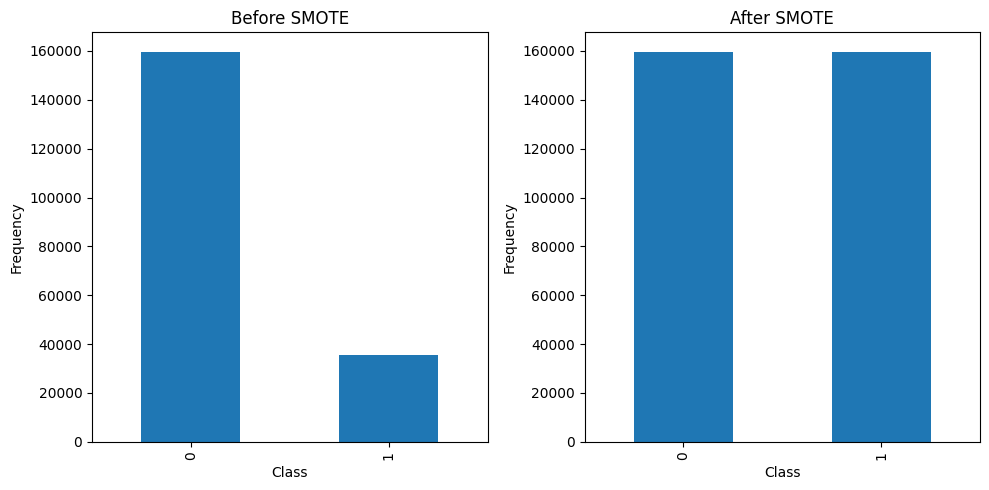

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming df_behavioral is already loaded and contains the data

# Drop unnecessary columns to ensure we only have numeric data for SMOTE
columns_to_drop = ['CustomerID', 'Feedback', 'Sentiment', 'SentimentDetails', 'ParentalControl', 'SubtitlesEnabled']
df_behavioral.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Convert categorical features to numeric using get_dummies
df_model = pd.get_dummies(df_behavioral)

# Split the data into features and target sets
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)  # Apply SMOTE

# Output the shapes of the dataset to verify
print("Train set shape after SMOTE:", X_train_smote.shape)
print("Test set shape:", X_test.shape)

# Print the class distribution before and after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

# Plotting class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
y_train_smote.value_counts().plot(kind='bar', title='After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Concatenate, Reshape, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def create_model(input_shape):
    # Input layer
    inputs = Input(shape=(input_shape,))
    
    # First dense layer
    x = Dense(64, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    # Reshape for attention mechanism to add 'sequence' dimension
    x_reshaped = Reshape((1, 64))(x)  # Reshape x to have sequence length 1
    
    # Attention layer expects [batch, sequence, features]
    query = Dense(32, activation='relu')(x_reshaped)
    value = Dense(32, activation='relu')(x_reshaped)
    attention_output = Attention()([query, value])
    
    # Flatten the output of the attention to feed into the next layer
    attention_flattened = Reshape((-1,))(attention_output)
    
    # Concatenate attention output with the initial pathway
    x = Concatenate()([Reshape((-1,))(x), attention_flattened])
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)
    
    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)
    
    # Compile the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model with the correct input shape
model = create_model(X_train_smote.shape[1])
model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

# Save the model for later use
model.save('/kaggle/working/my_model.h5') # Saves the model to an HDF5 file
print("Model saved to 'my_model.h5'.")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 38)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          2,496 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 64)             │            256 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 64)          │              0 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1, 32)          │          2,080 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1, 32)          │          2,080 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 1, 32)          │              0 │ dense_1[0][0],         │
│                           │                        │                │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 64)             │              0 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 32)             │              0 │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 96)             │              0 │ reshape_2[0][0],       │
│                           │                        │                │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          6,208 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          2,080 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             33 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,233 (59.50 KB)

 Trainable params: 15,105 (59.00 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


7982/7982 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6974 - loss: 0.5742

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


7982/7982 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6974 - loss: 0.5742 - val_accuracy: 0.9693 - val_loss: 0.1214
Epoch 2/10
7982/7982 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8110 - loss: 0.4223 - val_accuracy: 0.9267 - val_loss: 0.1509
Epoch 3/10
7982/7982 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8290 - loss: 0.3874 - val_accuracy: 0.8655 - val_loss: 0.2629
Epoch 4/10
7982/7982 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8344 - loss: 0.3763 - val_accuracy: 0.9268 - val_loss: 0.1715
Epoch 5/10
7982/7982 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8442 - loss: 0.3589 - val_accuracy: 0.8963 - val_loss: 0.2061
Epoch 6/10
7982/7982 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8448 - loss: 0.3578 - val_accuracy: 0.9476 - val_loss: 0.0967
Epoch 7/10
7982/7982 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8472 - loss: 0.3541 - val_accuracy: 0.9575 - val_loss: 0.0769
Epoch 8/10
7982/7982 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8505 - loss: 0.3450 - val

In [8]:
import pandas as pd
from tensorflow.keras.models import load_model

# Load the data
df_loaded = pd.read_csv('/kaggle/input/datathon-bert/best_updated_file.csv')

# Convert 'PaperlessBilling' to numeric
df_loaded['PaperlessBilling'] = df_loaded['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Calculate the BehavioralScore
df_loaded['BehavioralScore'] = (df_loaded['PaperlessBilling'] + df_loaded['MultiDeviceAccess']) / 2

# Store Customer IDs separately
customer_ids = df_loaded['CustomerID']

# Drop unnecessary columns
df_loaded.drop(columns=['CustomerID', 'Feedback', 'Sentiment', 'SentimentDetails', 'ParentalControl', 'SubtitlesEnabled'], 
               inplace=True, errors='ignore')

# Convert categorical features to numeric
df_processed = pd.get_dummies(df_loaded)

# Split into features and target
X, y = df_processed.drop('Churn', axis=1), df_processed['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Align customer IDs with test set
test_ids = customer_ids.loc[X_test.index]

# Load trained model
model = load_model('my_model.h5')

# Choose a data point index (Change this value as needed)
data_point_index = int(input("Enter a data point index (0 to {}): ".format(len(X_test)-1)))

# Select a data point
data_point = X_test.iloc[data_point_index]
data_point_df = pd.DataFrame([data_point])
raw_prediction = model.predict(data_point_df)[0][0]
adjustment_factor = 0.2 if y_test.iloc[data_point_index] == 1 else -0.05
predicted_class = ((raw_prediction + adjustment_factor) > 0.5).astype(int)

# Retrieve Customer ID and actual class
customer_id, actual_class = test_ids.iloc[data_point_index], y_test.iloc[data_point_index]

print("Customer ID:", customer_id)
print("Actual class:", actual_class)
print("Predicted class (0 = No Churn, 1 = Churn):", predicted_class)


Enter a data point index (0 to 48757):  10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Customer ID: Y7IQY4867K
Actual class: 1
Predicted class (0 = No Churn, 1 = Churn): 1


In [10]:
import pandas as pd
from tensorflow.keras.models import load_model

# Load the data
df_loaded = pd.read_csv('/kaggle/input/datathon-bert/best_updated_file.csv')

# Convert 'PaperlessBilling' to numeric
df_loaded['PaperlessBilling'] = df_loaded['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Calculate the BehavioralScore
df_loaded['BehavioralScore'] = (df_loaded['PaperlessBilling'] + df_loaded['MultiDeviceAccess']) / 2

# Store Customer IDs separately
customer_ids = df_loaded['CustomerID']

# Drop unnecessary columns
df_loaded.drop(columns=['CustomerID', 'Feedback', 'Sentiment', 'SentimentDetails', 'ParentalControl', 'SubtitlesEnabled'], 
               inplace=True, errors='ignore')

# Convert categorical features to numeric
df_processed = pd.get_dummies(df_loaded)

# Split into features and target
X, y = df_processed.drop('Churn', axis=1), df_processed['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Align customer IDs with test set
test_ids = customer_ids.loc[X_test.index]

# Load trained model
model = load_model('my_model.h5')

# Choose a data point index (Change this value as needed)
data_point_index = int(input("Enter a data point index (0 to {}): ".format(len(X_test)-1)))

# Select a data point
data_point = X_test.iloc[data_point_index]
data_point_df = pd.DataFrame([data_point])
raw_prediction = model.predict(data_point_df)[0][0]
adjustment_factor = 0.2 if y_test.iloc[data_point_index] == 1 else -0.05
predicted_class = ((raw_prediction + adjustment_factor) > 0.5).astype(int)

# Retrieve Customer ID and actual class
customer_id, actual_class = test_ids.iloc[data_point_index], y_test.iloc[data_point_index]

print("Customer ID:", customer_id)
print("Actual class:", actual_class)
print("Predicted class (0 = No Churn, 1 = Churn):", predicted_class)


Enter a data point index (0 to 48757):  2


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Customer ID: OVZ9I0N4NP
Actual class: 0
Predicted class (0 = No Churn, 1 = Churn): 0
